In [16]:
import time
import datetime as dt

import numpy as np
import pandas as pd

import sklearn
from sklearn import linear_model
from sklearn import metrics

import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
print "numpy version: ", np.__version__
print "scikit-learn version: ", sklearn.__version__
print "pandas version: ", pd.__version__

numpy version:  1.13.1
scikit-learn version:  0.19.0
pandas version:  0.20.3


In [52]:
# np.random.seed(0)
np.random.seed(np.int64(time.clock()*1000))

dlen = 100
split = 0.7
trainlen = np.int64(dlen * split)
testlen = dlen - trainlen

In [53]:
values = np.random.random(dlen)
# values = np.linspace(0,1,dlen)

classes = np.random.randint(0,2,dlen)
# classes = [0 if x <0.3 else 1 for x in values]


df = pd.DataFrame({'Value': values, 
                   'Class': classes})
print '>head of df\n', df.head()
print '> tail of df\n', df.tail()

dftrain = df[0:trainlen]
print '> train size = ', len(dftrain)

dftest = df[trainlen:]
print '> test size = ', len(dftest)

>head of df
   Class     Value
0      0  0.036387
1      1  0.198533
2      0  0.920645
3      0  0.397389
4      0  0.659461
> tail of df
    Class     Value
95      1  0.513142
96      1  0.415491
97      0  0.361094
98      1  0.309122
99      1  0.415226
> train size =  70
> test size =  30


In [5]:
# *********************************
# Linear Regression
# *********************************

lnreg = linear_model.LinearRegression()

lnreg.fit(X=dftrain[['Value']].values, y=dftrain[['Class']].values)

pred = lnreg.predict(dftest[['Value']])
print len(pred)
print pred

30
[[ 0.59479578]
 [ 0.51034049]
 [ 0.59484594]
 [ 0.53299142]
 [ 0.55534694]
 [ 0.438915  ]
 [ 0.47943212]
 [ 0.45238784]
 [ 0.48164961]
 [ 0.45214355]
 [ 0.48528239]
 [ 0.50129501]
 [ 0.44306613]
 [ 0.54756489]
 [ 0.52663092]
 [ 0.47653536]
 [ 0.51942068]
 [ 0.44802111]
 [ 0.52818513]
 [ 0.5869519 ]
 [ 0.48537981]
 [ 0.54339679]
 [ 0.45431729]
 [ 0.55153231]
 [ 0.48052964]
 [ 0.46286471]
 [ 0.52994247]
 [ 0.4357417 ]
 [ 0.57026133]
 [ 0.43317847]]


In [6]:
pred_class = np.array([0 if x<0.5 else 1 for x in pred])
print 'pred_class =', pred_class
test_class =dftest['Class'].values
print 'test_class =', test_class

pred_class = [1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0]
test_class = [1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [15]:
cmx = metrics.confusion_matrix(y_true=test_class, y_pred = pred_class)
print cmx

[[9 6]
 [6 9]]


In [8]:
auc = metrics.roc_auc_score(y_true=test_class, y_score = pred)
print auc

0.706666666667


In [9]:
recall = metrics.recall_score(y_true=test_class, y_pred=pred_class)
print recall

0.6


In [10]:
precision = metrics.precision_score(y_true=test_class, y_pred=pred_class)
print precision

0.6


In [11]:
# roc_curve:
fpr, tpr, th = metrics.roc_curve(y_true=test_class, y_score=pred)
print fpr
print tpr
print th

[ 0.          0.          0.06666667  0.06666667  0.13333333  0.13333333
  0.26666667  0.26666667  0.4         0.4         0.46666667  0.46666667
  1.          1.        ]
[ 0.06666667  0.26666667  0.26666667  0.33333333  0.33333333  0.4         0.4
  0.46666667  0.46666667  0.8         0.8         0.93333333  0.93333333
  1.        ]
[ 0.59484594  0.57026133  0.55534694  0.55153231  0.54756489  0.54339679
  0.52994247  0.52818513  0.51942068  0.48164961  0.48052964  0.47653536
  0.4357417   0.43317847]


In [12]:
# precision_recall_curve:
precision, recall, th = metrics.precision_recall_curve(y_true=test_class, probas_pred=pred)
print precision
print recall
print th
print len(th)

[ 0.5         0.48275862  0.5         0.51851852  0.53846154  0.56
  0.58333333  0.60869565  0.63636364  0.66666667  0.65        0.63157895
  0.66666667  0.64705882  0.625       0.6         0.57142857  0.53846154
  0.58333333  0.63636364  0.6         0.66666667  0.75        0.71428571
  0.83333333  0.8         1.          1.          1.          1.          1.        ]
[ 1.          0.93333333  0.93333333  0.93333333  0.93333333  0.93333333
  0.93333333  0.93333333  0.93333333  0.93333333  0.86666667  0.8         0.8
  0.73333333  0.66666667  0.6         0.53333333  0.46666667  0.46666667
  0.46666667  0.4         0.4         0.4         0.33333333  0.33333333
  0.26666667  0.26666667  0.2         0.13333333  0.06666667  0.        ]
[ 0.43317847  0.4357417   0.438915    0.44306613  0.44802111  0.45214355
  0.45238784  0.45431729  0.46286471  0.47653536  0.47943212  0.48052964
  0.48164961  0.48528239  0.48537981  0.50129501  0.51034049  0.51942068
  0.52663092  0.52818513  0.52994247  

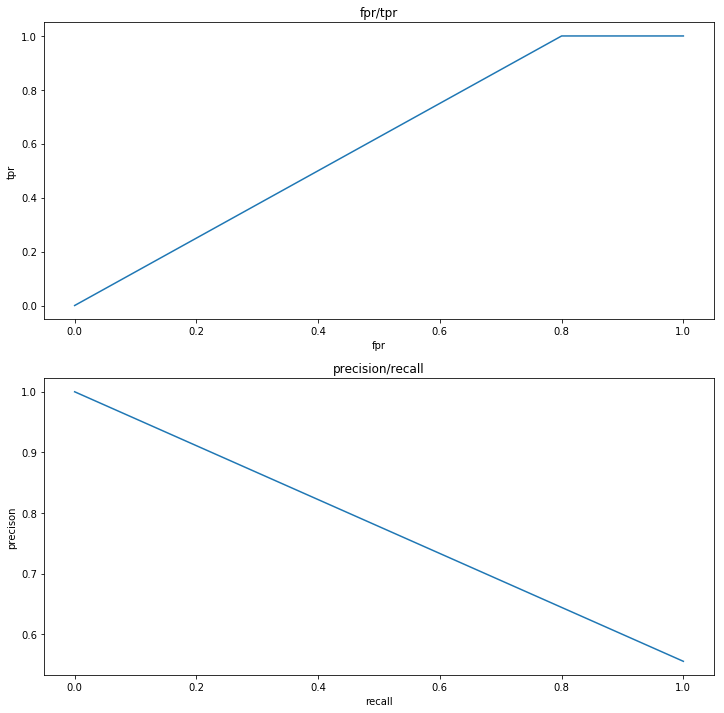

In [63]:
#-----------------------------
# Define color maps
#-----------------------------

mycolormap = cm.jet
# mycolormap = cm.coolwarm
# mycolormap = cm.autumn
# mycolormap = cm.hot
# mycolormap = cm.Greys

# create figure canvas
fig = plt.figure(figsize=[12,12],facecolor='white')   # 16(inches) by 10(inches)
# fig = plt.figure(facecolor='white')   # use default fig size

ax1 = fig.add_subplot(211) 
ax1.plot(fpr,tpr)
ax1.set_title('fpr/tpr')
ax1.set_xlabel('fpr')
ax1.set_ylabel('tpr')

ax2 = fig.add_subplot(212) 
ax2.plot(recall, precision)
ax2.set_title('precision/recall')
ax2.set_ylabel('precison')
ax2.set_xlabel('recall')

plt.show()

In [56]:
# *********************************
# Logistic Regression
# *********************************

logreg = linear_model.LogisticRegression()

logreg.fit(X=dftrain[['Value']].values, y=dftrain['Class'].values)

pred_log = logreg.predict(dftest[['Value']])
print len(pred_log)
print pred_log

30
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [57]:
print dftest['Class'].values
print pred_log

[0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1]
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


In [58]:
auc = metrics.roc_auc_score(y_true=test_class, y_score = pred_log)
print 'auc =',auc

recall = metrics.recall_score(y_true=test_class, y_pred=pred_log)
print 'recall =',recall

precision = metrics.precision_score(y_true=test_class, y_pred=pred_log)
print 'precision =',precision

auc = 0.6
recall = 1.0
precision = 0.555555555556


In [59]:
# roc_curve:
fpr, tpr, th = metrics.roc_curve(y_true=test_class, y_score=pred_log)
print fpr
print tpr
print th

[ 0.   0.8  1. ]
[ 0.  1.  1.]
[2 1 0]


In [60]:
# precision_recall_curve:
precision, recall, th = metrics.precision_recall_curve(y_true=test_class, probas_pred=pred_log)
print precision
print recall
print th
print len(th)

[ 0.55555556  1.        ]
[ 1.  0.]
[1]
1


In [61]:
print test_class
print pred_log


[1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]
[1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
